# Project: Decision Trees and Random Forest - Loan Eligibility Prediction
**Marks: 30**



Dear Learner,

Welcome to project on Classification usind trees and forests. We will continue our work on the the Loan eligibility project and will talk about the decision trees and forests to check their performance on the data.

Do read the problem statement and the guidelines around the same.

----
## Context: 
-------

Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

---------
## Objective:
------------
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

--------
## Attributes Information:
------------

* Variable:	------------------------------     Description
* Loan_ID:	-------------------------------          Unique Loan ID
* Gender:	  --------------------------------        Male/ Female
* Married:	-------------------------------          Applicant married (Y/N)
* Dependents:--------------------------	      Number of dependents
* Education:----------------------------      Applicant Education (Graduate/ Under Graduate)
* Self_Employed:--------------------	  Self employed (Y/N)
* ApplicantIncome:-----------------	  Applicant income
* CoapplicantIncome:------------- Coapplicant income
* LoanAmount:------------------------	      Loan amount in thousands
* Loan_Amount_Term:------------  Term of loan in months
* Credit_History:----------------------	  credit history meets guidelines
* Property_Area:----------------------	  Urban/ Semi Urban/ Rural
* Loan_Status:-------------------------	      Loan approved (Y/N) 
(Loan_Status Y/1: loan paid back; N/0: loan default)

---------------------------
## Guidelines
-----------------------------------------
- The exercise consists of semi written code blocks. You need to fill the blocks as per the instructions to achieve the required results.
- To be able to complete the assessment in the expected time, do not change the variable names. The codes might throw errors when the names are changed. 
- The marks of each requirement is mentioned in the question.
- You can raise your issues on the discussion forum on the Olympus.
- You can use Jupyter Notebook/ Google Colab(recommended) for this assessment.
- Uncomment the code snippets and work on them
--------------------------------------------
Wishing you all the best!

### Import Libraries and Load Dataset

In [1]:
from google.colab import files
uploaded = files.upload()

Saving CreditRisk.csv to CreditRisk (2).csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['CreditRisk.csv']))

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [5]:
print(df.shape)

(614, 13)


### Exploring data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [7]:
# Lets analyze the distribution of the various attributes

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


**Insights:** `CoapplicantIncome and LoanAmount has 0's that can't happen so no need to fill these values`

In [8]:
df.nunique() # Number of unique values in a column

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Insights:**
- `Loan_Amount_Term is categorical as it has only 10 unique values`
- `Loan_ID column has all unique values and it not a continous column so it has 614 categories one for each row and that would not provide any info to the algorithm`

In [9]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


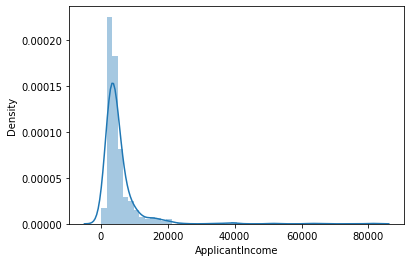

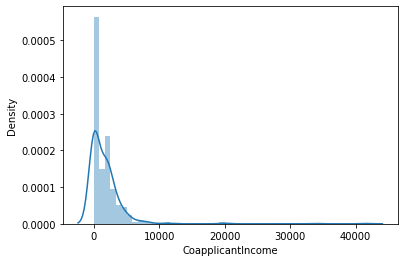

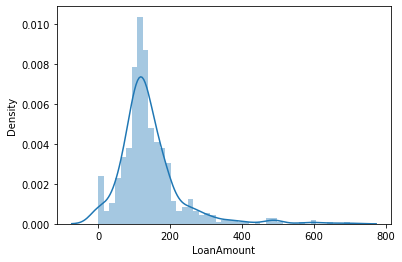

In [10]:
# distplot for continous columns
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    sns.distplot(df[i])
    plt.show()

In [11]:
cr_df['Loan_Amount_Term'].value_counts(normalize = True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [12]:
#The Loan_Amount_Term is highly skewed - so we will delete this column

cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [13]:
cr_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

### Complete the below snippets to generate the countplots for all the categorical columns

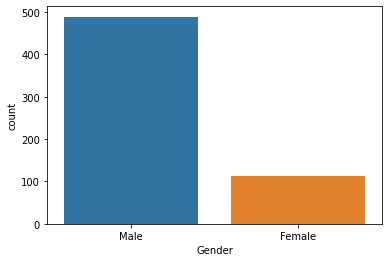

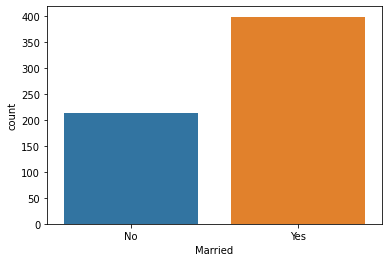

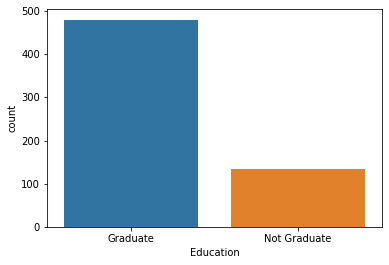

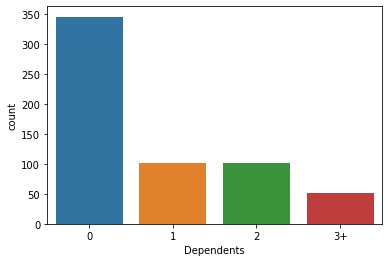

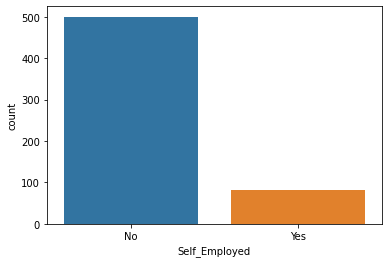

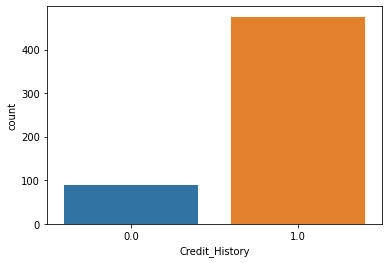

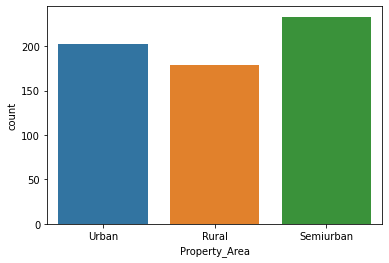

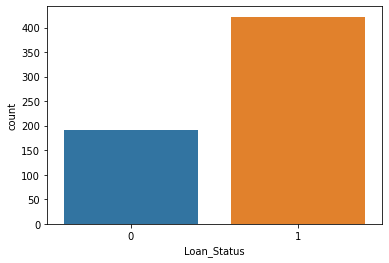

In [14]:
for i in ['Gender','Married','Education','Dependents','Self_Employed','Credit_History','Property_Area','Loan_Status']:
    sns.countplot(cr_df[i])
    plt.show()

### Null Values Treatment


In [15]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
cr_df['Credit_History'].fillna(0,inplace=True)

cr_df['Self_Employed'].fillna('No',inplace=True) #replacing with mode

cr_df['Dependents'].fillna('0',inplace=True) #replacing with mode

In [17]:
# Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [18]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,Male,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


**Insights:**
- `When Gender is Male Loan Status is 1 and Property_Area is Urban then mostly they are married.(mode)`

In [19]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [20]:
cr_df.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Bivariate Analysis


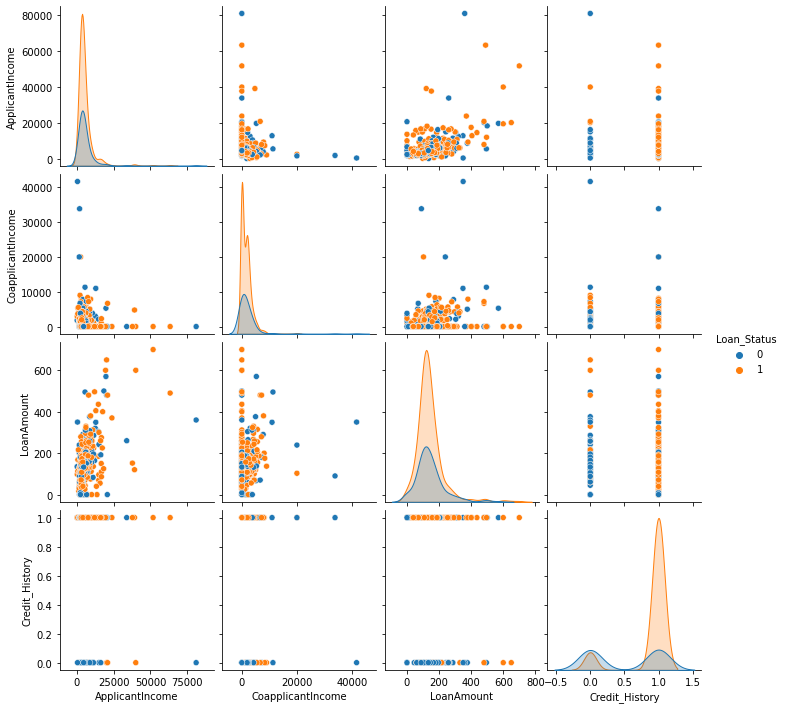

In [21]:
sns.pairplot(cr_df, hue = 'Loan_Status')

In [22]:
cr_df.groupby('Gender')['CoapplicantIncome'].median()
cr_df.groupby('Gender')['CoapplicantIncome'].mean()

Gender
Female    1108.008929
Male      1742.932352
Name: CoapplicantIncome, dtype: float64

In [23]:
pd.crosstab(cr_df['Gender'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [24]:
pd.crosstab(cr_df['Married'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Married,,
No,0.369159,0.630841
Yes,0.282500,0.717500


In [25]:
pd.crosstab(cr_df['Education'],cr_df['Loan_Status'],normalize='index')

Loan_Status,0,1
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


In [26]:
pd.crosstab(cr_df['Self_Employed'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Self_Employed,,
No,0.864583,0.867299
Yes,0.135417,0.132701


**Insights:**
- `Self Employed people have same distribution, We should check how this feature influences final model using coefficients`

In [27]:
pd.crosstab(cr_df['Dependents'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Dependents,,
0,0.588542,0.585308
1,0.187500,0.156398
2,0.130208,0.180095
3+,0.093750,0.078199


In [28]:
pd.crosstab(cr_df['Property_Area'],cr_df['Loan_Status'],normalize='columns')

Loan_Status,0,1
Property_Area,,
Rural,0.359375,0.260664
Semiurban,0.281250,0.424171
Urban,0.359375,0.315166


### Data Preparation


In [29]:
# How many null values are left:
cr_df.isnull().sum()

Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Note: Gender has 13 null values, which are filled by 0s when using pd.get_dummies. Since Gender_Male is kept in X and Gender_Female is dropped, the null values are effectively set to 0 in male and implied to be female.

In [30]:
# Define X and Y variables

X = cr_df.drop(columns = {'Loan_Status'})
Y = cr_df['Loan_Status'].astype('category')     

# Note: Loan_Status=0: loan default, Loan_Status=1:loan paid back

In [31]:
# Convert categorical vriables to dummy variables

X = pd.get_dummies(X, drop_first=True)

### Split the data into train, val and test set - 2 marks

In [32]:
## Split into training and test set
from sklearn.model_selection import train_test_split

# Split in train and test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=7, stratify = Y)
# Further split the train into train and validation (70:30)
X_train, X_val, y_train, y_val =  train_test_split(X_train, y_train, test_size=0.30,random_state=7, stratify = y_train )

### Model building using Decision Trees - 14 marks

- Initialise the tree - 2 marks
- Fit the train data on the tree model - 2 marks
- Report the classification metrics on the train and validation set - 1 marks
- Comment on which metric is more important if the cost of giving loan to a potential defaulter is very high and should be minimised through the modelling process. - 2 marks
- Loop through the different values of max_depth to observe the recall on class 0 (refer to the codes available in the self study/MLS slides) and figure out its best value to reduce overfitting. Also, keep in mind the performance on the val set. Report the results into a dataframe. - 3 marks
- Fit the train data with the max_depth observed above. - 2 marks
- Report the classification report on the test set and present the final observations. - 2 marks
 

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# initialize the decision tree criterion  = 'entropy'.
dtc = DecisionTreeClassifier(criterion='entropy')

# fit the tree (fully grown) and report the metrics on the train set.

dtc.fit(X_train, y_train)

print(classification_report(y_train , dtc.predict(X_train)))
print(classification_report(y_val , dtc.predict(X_val)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       206

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

              precision    recall  f1-score   support

           0       0.44      0.45      0.44        40
           1       0.75      0.74      0.75        89

    accuracy                           0.65       129
   macro avg       0.59      0.60      0.60       129
weighted avg       0.65      0.65      0.65       129



**Comment on the metric here:** 
- Recall for Loan Defaults (class 0) is the more important metric and should be high. 
- Recall for 0 = (0s predicted as 0s)/(0s predicted as 0s + 0s predicted as 1s). 
- If many of the 0s are predicted as 1s, the recall will be low. (i.e., giving a loan to a defaulter,  by predicting a "0" as a "1").
- In the fully-grown decision tree, recall=0.4 for class 0 in the validation set, which is low. 

In [34]:
from sklearn.metrics import recall_score
dict_recall = {}

for max_depth in range(3,21):
    lista = []
    dtree = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth, random_state=42)
    dtree.fit(X_train, y_train)
    lista.append(recall_score(y_train, dtree.predict(X_train), pos_label=0))
    lista.append(recall_score(y_val, dtree.predict(X_val), pos_label=0))
    dict_recall[max_depth] = lista

df = pd.DataFrame(dict_recall)
df.index = ['Train', 'Val']
df

,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Train,0.531915,0.531915,0.617021,0.691489,0.765957,0.882979,0.93617,0.968085,0.978723,0.978723,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
Val,0.525000,0.350000,0.375000,0.450000,0.450000,0.425000,0.42500,0.450000,0.450000,0.450000,0.45,0.45,0.45,0.45,0.45,0.45,0.45,0.45


**Comments about the max_depth:**
- As max_depth is increased, there is over-fitting, i.e., the model performs very well on the training set, but the performance on the validation set decreases.
- If max_depth is very low, the model may be under-fitting, as it does not perform well on the training set.
- A max_depth in the range of 3, 6 or 10 may be selected, as the performance does not improve with higher depth.
- To avoid underfitting, a max_depth of 6 or 10 is preferred.
- It is seen below that the performance at a max_depth of 10 and 6 is similar, so the max_depth of 6 is preferred for simplicity.

Below, max_depth of 6, 10 and 3 are all tried. The classification report shows that the max_depth of 10 gives a better prediction of the recall for loan defaults on the test set. It is seen below that the performance at a max_depth of 10 and 6 is similar, so the max_depth of 6 is preferred to avoid over-fitting and for simplicity.

In [35]:
# Decision tree with max_depth of 6
dtcf = DecisionTreeClassifier(max_depth=6, criterion='entropy', random_state=42)

# Fit the data on the train set 
dtcf.fit(X_train, y_train)
# Print the classification report on the test data here
print(classification_report(y_test, dtcf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52        58
           1       0.78      0.79      0.78       127

    accuracy                           0.70       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.70      0.70      0.70       185



In [36]:
# Decision tree with max_depth of 10
dtcf10 = DecisionTreeClassifier(max_depth=10, criterion='entropy', random_state=42)

# Fit the data on the train set 
dtcf10.fit(X_train, y_train)
# Print the classification report on the test data here
print(classification_report(y_test, dtcf10.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        58
           1       0.79      0.78      0.78       127

    accuracy                           0.70       185
   macro avg       0.66      0.66      0.66       185
weighted avg       0.70      0.70      0.70       185



In [37]:
# Decision tree with max_depth of 3
dtcf3 = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)

# Fit the data on the train set 
dtcf3.fit(X_train, y_train)
# Print the classification report on the test data here
print(classification_report(y_test, dtcf3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.47      0.52        58
           1       0.78      0.86      0.82       127

    accuracy                           0.74       185
   macro avg       0.69      0.66      0.67       185
weighted avg       0.72      0.74      0.72       185



**Observations:**
- The max_depth of 6 is selected as the best option to reduce over-fitting and under-fitting.
- The max_depth of 6 gives a recall for loan defaults = 0.52.
- Recall for paying back the loan ("1") is 0.79, but this is less important since it implies the bank turned down applicants who would have paid back, but it is less damaging to the bank compared to giving a loan to a defaulter.

### Visualise the tree - 2 marks

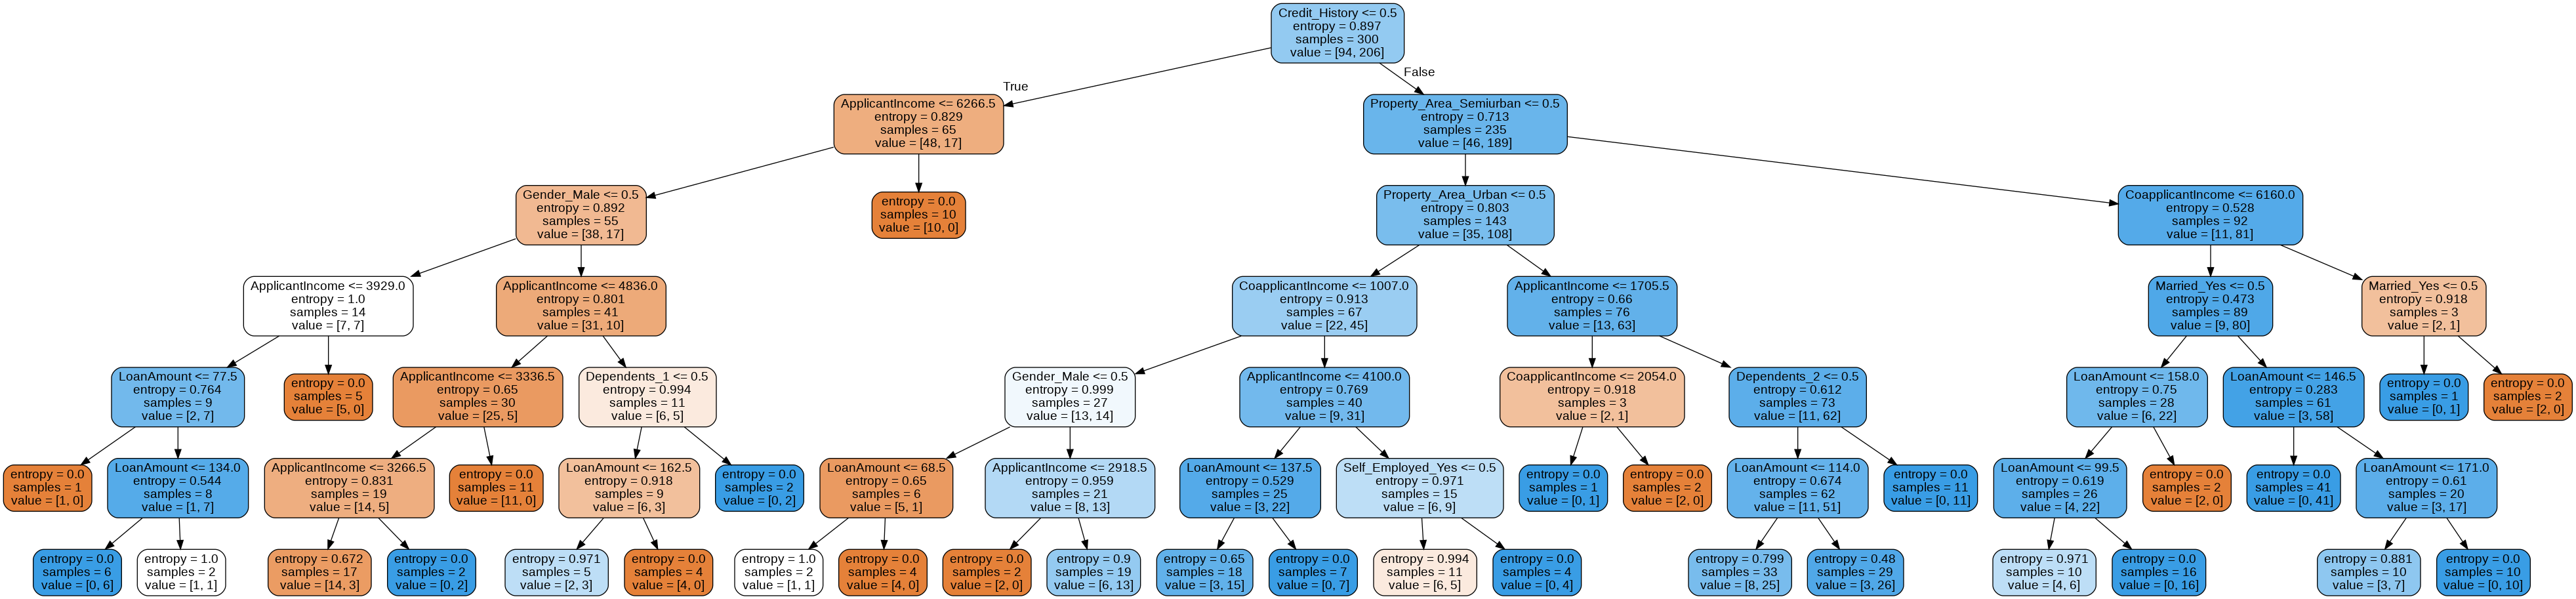

In [38]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
#from io import StringIO  
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import graphviz

dot_data = StringIO()
export_graphviz(dtcf, out_file=dot_data, filled  = True, rounded = True, feature_names=X.columns)
graph = graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())


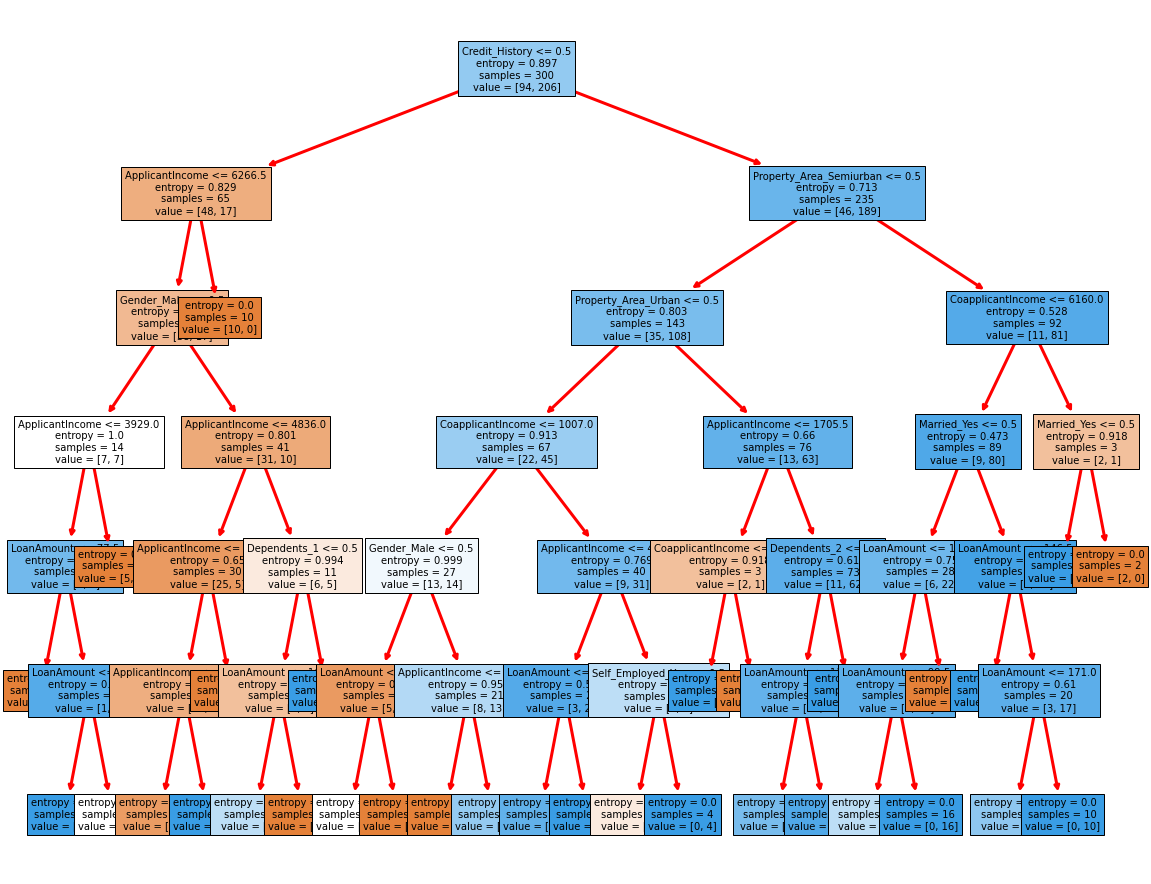

In [48]:
# Alternative tree visualization:

from sklearn import tree
fig, ax = plt.subplots(figsize=(20,16))
out = tree.plot_tree(dtcf, filled=True, fontsize=10, feature_names=X.columns)
for o in out:
    arrow=o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)
plt.show()

The most important features are identified in the decision tree classifier with max_depth of 6 below:

In [40]:
dtcf_fimp = pd.DataFrame()
dtcf_fimp['Feature Importances'] = dtcf.feature_importances_
dtcf_fimp['Features'] = X_train.columns
dtcf_fimp.set_index('Features', inplace=True)
dtcf_fimp.sort_values(by='Feature Importances', ascending=False, inplace=True)
dtcf_fimp.head()

,Feature Importances
Features,
Credit_History,0.316569
LoanAmount,0.219424
ApplicantIncome,0.207742
CoapplicantIncome,0.066381
Married_Yes,0.043691


### Model building using Random Forests - 9 marks

- Initiate a random forest model with criterion as 'entropy' and report the metrics on the train and the validation set. - 2 mark
- try with different values of n_estimators and figure out the best based on the earlier logic. - 3 marks
- Use the number of estimators figured out through the step above and build the final model. - 2 marks
- Report the result on the test data and add observations. - 2 marks

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Random forest with default 100 estimators
rf = RandomForestClassifier(criterion='entropy')  #initialize the model 

rf.fit(X_train , y_train)

#Report the metrics on the train and the validation set here
print(classification_report(y_train, rf.predict(X_train)))
print(classification_report(y_val, rf.predict(X_val)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       206

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

              precision    recall  f1-score   support

           0       0.65      0.50      0.56        40
           1       0.80      0.88      0.83        89

    accuracy                           0.76       129
   macro avg       0.72      0.69      0.70       129
weighted avg       0.75      0.76      0.75       129



- The random forest with n_estimators=100 performs very well on the training set, but gives a low recall of 0.45 for class 0 (loan defaults) on the validation set. 
- This points to over-fitting.
- Trying random forest classifier with n_estimators between 100 and 1000:

In [42]:
from sklearn.metrics import recall_score
dict_recall = {}

for estimators in range(100,1001, 100):
    lista = []
    rfc = RandomForestClassifier(criterion = 'entropy',n_estimators = estimators, random_state=42)
    rfc.fit(X_train, y_train)
    lista.append(recall_score(y_train, rfc.predict(X_train), pos_label = 0))
    lista.append(recall_score(y_val, rfc.predict(X_val), pos_label = 0))
    dict_recall[estimators] = lista

df = pd.DataFrame(dict_recall)
df.index = ['Train', 'Val']
df

,100,200,300,400,500,600,700,800,900,1000
Train,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Val,0.525,0.525,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [43]:
# The random forest with 100 estimators is selected, 
# since having more estimators does not improve the performance on the validation set

rfcf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)

rfcf.fit(X_train, y_train)

# report the metrics on the test set here
print(classification_report(y_test, rfcf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.53      0.43      0.48        58
           1       0.76      0.83      0.79       127

    accuracy                           0.70       185
   macro avg       0.65      0.63      0.63       185
weighted avg       0.69      0.70      0.69       185



**Observations:** 
 - The random classifier with 100 estimators is over-fitting, as seen from the high perfomance on the training set, but poor performance on the test set.
 - A recall score of 0.43 is obtained for class 0 (defaults) on the test set.
 - The decision tree with max_depth=6 performs better (and has a recall of 0.52 for class 0 on the test set).
 - Random forests with fewer estimators, between 2 and 90 are tried below. The results on the validation set suggest that it may be better to use a random forest with < 10 trees. 
 - Alternatively, a different criterion can be explored instead of entropy.

In [44]:
# Testing random forests with 2 to 90 estimators,
# using entropy criterion

dict_recall2 = {}

for estimators in list(range(2,10,1)) + list(range(10, 91, 20)):
    lista = []
    rfc2 = RandomForestClassifier(criterion = 'entropy',n_estimators = estimators, random_state=42)
    rfc2.fit(X_train, y_train)
    lista.append(recall_score(y_train, rfc2.predict(X_train), pos_label = 0))
    lista.append(recall_score(y_val, rfc2.predict(X_val), pos_label = 0))
    dict_recall2[estimators] = lista

df2 = pd.DataFrame(dict_recall2)
df2.index = ['Train', 'Val']
df2

,2,3,4,5,6,7,8,9,10,30,50,70,90
Train,0.968085,0.851064,0.968085,0.893617,0.93617,0.914894,0.957447,0.957447,0.978723,0.989362,1.000,1.0,1.000
Val,0.675000,0.425000,0.575000,0.425000,0.57500,0.450000,0.525000,0.425000,0.525000,0.450000,0.425,0.4,0.475


The performance on the validation set is better when the number of estimators in the random forest is < 10 (n_estimators = 2, 4, 6 or 8 perform better).

In [45]:
# The random forest with 4 estimators is tried here: 
# since having more estimators does not improve the performance on the validation set

rfcf_4 = RandomForestClassifier(n_estimators=4, criterion='entropy', random_state=42)

rfcf_4.fit(X_train, y_train)

# report the metrics on the test set here
print(classification_report(y_test, rfcf_4.predict(X_test)))

              precision    recall  f1-score   support

           0       0.42      0.59      0.49        58
           1       0.77      0.64      0.70       127

    accuracy                           0.62       185
   macro avg       0.60      0.61      0.60       185
weighted avg       0.66      0.62      0.63       185



The random forest with 4 estimators has a recall of 0.59 for class 0 (loan defaults), which is an improvement over the random forest with 100 estimators and the decision tree with max_depth 6 (but the recall for class 1 is worse).

The most important features are identified in the random forest classifier with 4 estimators below:

In [46]:
rfcf4_fimp = pd.DataFrame()
rfcf4_fimp['Feature Importances'] = rfcf_4.feature_importances_
rfcf4_fimp['Features'] = X_train.columns
rfcf4_fimp.set_index(['Features'], inplace=True)
rfcf4_fimp.sort_values(by = ['Feature Importances'],  ascending=False, inplace=True)
rfcf4_fimp.head()

,Feature Importances
Features,
ApplicantIncome,0.262298
LoanAmount,0.201047
Credit_History,0.148834
CoapplicantIncome,0.132940
Property_Area_Urban,0.044605


Here, I will continue to use the random forest with 100 estimators, as given in the project. The most important features are identified in the random forest classifier with 100 estimators below:

In [47]:
rfcf_fimp = pd.DataFrame()
rfcf_fimp['Feature Importances'] = rfcf.feature_importances_
rfcf_fimp['Features'] = X_train.columns
rfcf_fimp.set_index(['Features'], inplace=True)
rfcf_fimp.sort_values(by = ['Feature Importances'],  ascending=False, inplace=True)
rfcf_fimp.head()

,Feature Importances
Features,
LoanAmount,0.223428
ApplicantIncome,0.222016
Credit_History,0.161706
CoapplicantIncome,0.132734
Married_Yes,0.038753


### Business Insights - 3 marks
- Present the insights/results from the project. - 2 marks
- Comment on the issues that have led to the reported performance. - 1 mark

**Insights/results**
- The decision tree classifier with max_depth=6 gives a recall of 0.52 for class 0 (loan defaults) on the test set.
- The random forest classifier with 100 estimators has a recall of 0.43 for class 0 (loan defaults) on the test set. The performance could be improved by using n_estimators=4 (which gave a recall of 0.59 for class 0 on the test set, but the recall for class 1 is worse).
- The over-fitting caused by using a large number of estimators or high max_depth could lead to poorer performance in the test set.
- Other parameters could potentially be varied to improve the fit, such as criterion, max_features, min_samples_leaf for the tree, or the AdaBoostClassifier.
- The 3 most important features were found to be: Loan Amount, Applicant Income and Credit History, in the decision tree and random forest classifiers. Coapplicant Income and Married_Yes were also found to be important features.